<a href="https://colab.research.google.com/github/ahmedimf1/DataScience/blob/master/Housing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns





In [15]:
url = 'https://raw.githubusercontent.com/ahmedimf1/DataScience/master/Housing_data'
raw_data = pd.read_csv(url,sep='\t')


In [16]:
raw_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
sns.pairplot(raw_data)

In [ ]:
x= raw_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
       
y = raw_data['Price']

y.head(3)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
model=LinearRegression()
model.fit(x_train, y_train)
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])


,Coeff
Avg. Area Income,21.733167
Avg. Area House Age,165202.132709
Avg. Area Number of Rooms,122154.622528
Avg. Area Number of Bedrooms,1966.064715
Area Population,15.248490


In [58]:
predictions = model.predict(x_test)



(array([  4.,  41., 125., 283., 374., 353., 194., 103.,  20.,   3.]),
 array([-329934.43240912, -262004.25486901, -194074.07732889,
        -126143.89978878,  -58213.72224866,    9716.45529145,
          77646.63283157,  145576.81037168,  213506.9879118 ,
         281437.16545191,  349367.34299203]),
 <a list of 10 Patch objects>)

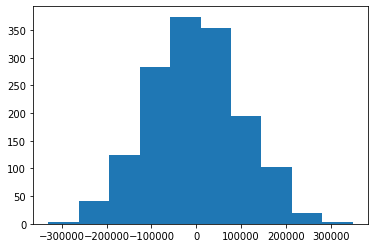

In [59]:
#plt.scatter(y_test, predictions)
plt.hist(y_test - predictions)

In [54]:
from sklearn import metrics


In [60]:
metrics.mean_absolute_error(y_test, predictions)

81779.95884919826